# 使用PyMatGen和plotly画DOS和能带结构

# DOS
这篇paper将通过两个简单的例子，展示如何通过pymatgen画图

- pymatgen: (Python Materials Genomics:Python材料基因模块),是一个强大的，适用于材料分析研究的开源的库。
- plotly: 是一个可交互的画图工具

---
__首先导入必要的package__

In [61]:
%matplotlib inline
from pymatgen import Element
from pymatgen.io.vasp import Vasprun  # 读取vasp作业(vasprun.xml)
from pymatgen.io.vasp import Vasprun, BSVasprun
from pymatgen.electronic_structure.plotter import DosPlotter
from pymatgen.electronic_structure.core import Spin, OrbitalType


import plotly.plotly as pltly
import plotly.tools as tls
import plotly.graph_objs as go

---
__画Density of States__

#### 一个简单的作业
读取vasp作业下的vasprun.xml文件


1. Eaxmple [Al]

In [62]:
dosrun = Vasprun('non_SCF/vasprun.xml')
spd_dos = dosrun.complete_dos.get_spd_dos()

In [63]:
trace_tdos = go.Scatter(
    x=dosrun.tdos.densities[Spin.up],
    y=dosrun.tdos.energies - dosrun.efermi,
    mode='lines',
    name='Total DOS',
    line=go.Line(color='#444444'),
    fill='tozeroy')

# 3s contribution to the total DOS
trace_3s = go.Scatter(
    x=spd_dos[OrbitalType.s].densities[Spin.up],
    y=dosrun.tdos.energies - dosrun.efermi,
    mode="lines",
    name="3s",
    line=go.Line(color="red"))

# 3p contribution to the total DOS
trace_3p = go.Scatter(
    x=spd_dos[OrbitalType.p].densities[Spin.up],
    y=dosrun.tdos.energies - dosrun.efermi,
    mode="lines",
    name="3p",
    line=go.Line(color="green"))

dosdata = go.Data([trace_tdos, trace_3s, trace_3p])

In [64]:
dosxaxis = go.XAxis(
    title="Density of states",
    showgrid=True,
    showline=True,
    range=[.01, 3],
    mirror="ticks",
    ticks="inside",
    linewidth=2,
    tickwidth=2
)
dosyaxis = go.YAxis(
    title="$E - E_f \quad / \quad \\text{eV}$",
    showgrid=True,
    showline=True,
    ticks="inside",
    mirror='ticks',
    linewidth=2,
    tickwidth=2,
    zerolinewidth=2
)
doslayout = go.Layout(
    title="Density of states",
    xaxis=dosxaxis,
    yaxis=dosyaxis
)

In [65]:
dosfig = go.Figure(data=dosdata, layout=doslayout)
plot_url = pltly.plot(dosfig, filename="DOS_Al", auto_open=False)
tls.embed(plot_url)

2. Example (稍微复杂的体系)

In [76]:
dosrun = Vasprun('1/2/3/vasprun.xml')
spd_dos = dosrun.complete_dos.get_spd_dos()
trace_tdos = go.Scatter(
    x=dosrun.tdos.densities[Spin.up],
    y=dosrun.tdos.energies - dosrun.efermi,
    mode='lines',
    name='Total DOS',
    line=go.Line(color='#444444'),
    fill='tozeroy')

# 3s contribution to the total DOS
trace_3s = go.Scatter(
    x=spd_dos[OrbitalType.s].densities[Spin.up],
    y=dosrun.tdos.energies - dosrun.efermi,
    mode="lines",
    name="3s",
    line=go.Line(color="red"))

# 3p contribution to the total DOS
trace_3p = go.Scatter(
    x=spd_dos[OrbitalType.p].densities[Spin.up],
    y=dosrun.tdos.energies - dosrun.efermi,
    mode="lines",
    name="3p",
    line=go.Line(color="green"))

dosdata = go.Data([trace_tdos, trace_3s, trace_3p])

dosxaxis = go.XAxis(
    title="Density of states",
    showgrid=True,
    showline=True,
    range=[.01, 50],
    mirror="ticks",
    ticks="inside",
    linewidth=2,
    tickwidth=2
)
dosyaxis = go.YAxis(
    title="$E - E_f \quad / \quad \\text{eV}$",
    showgrid=True,
    showline=True,
    ticks="inside",
    mirror='ticks',
    linewidth=2,
    tickwidth=2,
    zerolinewidth=2
)
doslayout = go.Layout(
    title="Density of states",
    xaxis=dosxaxis,
    yaxis=dosyaxis
)

dosfig = go.Figure(data=dosdata, layout=doslayout)
plot_url = pltly.plot(dosfig, filename="$H_{18}C_{70}N_{67}F_666$", auto_open=False)
tls.embed(plot_url)

In [75]:
# DOS 投影到不同元素

cdos = dosrun.complete_dos
element_dos = cdos.get_element_dos()

trace_tdos = go.Scatter(
    x=dosrun.tdos.densities[Spin.up],
    y=dosrun.tdos.energies - dosrun.efermi,
    mode='lines',
    name='Total DOS',
    line=go.Line(color='#444444'),
    fill='tozeroy')

# H contribution to the total DOS
trace_H = go.Scatter(
    x=element_dos[Element('H')].densities[Spin.up],
    y=dosrun.tdos.energies - dosrun.efermi,
    mode="lines",
    name="H",
    line=go.Line())

# C contribution to the total DOS
trace_C = go.Scatter(
    x=element_dos[Element('C')].densities[Spin.up],
    y=dosrun.tdos.energies - dosrun.efermi,
    mode="lines",
    name="C",
    line=go.Line())

# N contribution to the total DOS
trace_N = go.Scatter(
    x=element_dos[Element('N')].densities[Spin.up],
    y=dosrun.tdos.energies - dosrun.efermi,
    mode="lines",
    name="N",
    line=go.Line())

# F contribution to the total DOS
trace_F = go.Scatter(
    x=element_dos[Element('F')].densities[Spin.up],
    y=dosrun.tdos.energies - dosrun.efermi,
    mode="lines",
    name="F",
    line=go.Line())


dosdata = go.Data([trace_tdos, trace_H, trace_C, trace_N, trace_F])

dosxaxis = go.XAxis(
    title="Density of states",
    showgrid=True,
    showline=True,
    range=[.01, 50],
    mirror="ticks",
    ticks="inside",
    linewidth=2,
    tickwidth=2
)
dosyaxis = go.YAxis(
    title="$E - E_f \quad / \quad \\text{eV}$",
    showgrid=True,
    showline=True,
    ticks="inside",
    mirror='ticks',
    linewidth=2,
    tickwidth=2,
    zerolinewidth=2
)
doslayout = go.Layout(
    title="Density of states",
    xaxis=dosxaxis,
    yaxis=dosyaxis
)

dosfig = go.Figure(data=dosdata, layout=doslayout)
plot_url = pltly.plot(dosfig, filename="$H_{18}C_{70}N_{67}F_1_233$", auto_open=False)
tls.embed(plot_url)

---
__能带结构作图__

#### 一个简单的作业
读取vasp作业下的vasprun.xml文件


1. Eaxmple [Al]

In [68]:
run = BSVasprun("./band/vasprun.xml", parse_projected_eigen = True)
bands = run.get_band_structure(kpoints_filename="band/KPOINTS", line_mode=True, efermi=dosrun.efermi)

In [69]:
emin = 1e100
emax = -1e100
for spin in bands.bands.keys():
    for band in range(bands.nb_bands):
        emin = min(emin, min(bands.bands[spin][band]))
        emax = max(emax, max(bands.bands[spin][band]))
emin = emin - bands.efermi - 1
emax = emax - bands.efermi + 1

In [70]:
kptslist = [k for k in range(len(bands.kpoints))]
bandTraces = list()
for band in range(bands.nb_bands):
    bandTraces.append(
        go.Scatter(
            x=kptslist,
            y=[e - bands.efermi for e in bands.bands[Spin.up][band]],
            mode="lines",
            line=go.Line(color="#666666"),
            showlegend=False
        )
    )

    
    

In [71]:
labels = [r"$L$", r"$\Gamma$", r"$X$", r"$U,K$", r"$\Gamma$"]
step = len(bands.kpoints) / (len(labels) - 1)
# vertical lines
vlines = list()
for i, label in enumerate(labels):
    vlines.append(
        go.Scatter(
            x=[i * step, i * step],
            y=[emin, emax],
            mode="lines",
            line=go.Line(color="#111111", width=1),
            showlegend=False
        )
    )
# Labels of highsymetry k-points are added as Annotation object
annotations = list()
for i, label in enumerate(labels):
    annotations.append(
        go.Annotation(
            x=i * step, y=emin,
            xref="x1", yref="y1",
            text=label,
            xanchor="center", yanchor="top",
            showarrow=False
        )
    )

/usr/local/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:144: DeprecationWarning:

plotly.graph_objs.Annotation is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Annotation
  - plotly.graph_objs.layout.scene.Annotation




In [72]:
bandxaxis = go.XAxis(
    title="k-points",
    range=[0, len(bands.kpoints)],
    showgrid=True,
    showline=True,
    ticks="",
    showticklabels=False,
    mirror=True,
    linewidth=2
)
bandyaxis = go.YAxis(
    title="$E - E_f \quad / \quad \\text{eV}$",
    range=[emin, emax],
    showgrid=True,
    showline=True,
    zeroline=True,
    mirror="ticks",
    ticks="inside",
    linewidth=2,
    tickwidth=2,
    zerolinewidth=2
)
bandlayout = go.Layout(
    title="Bands diagram",
    xaxis=bandxaxis,
    yaxis=bandyaxis,
    annotations=go.Annotations(annotations)
)

/usr/local/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:66: DeprecationWarning:

plotly.graph_objs.Annotations is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.layout.Annotation
  - plotly.graph_objs.layout.scene.Annotation




In [73]:
bandfig = go.Figure(data=bandTraces + vlines, layout=bandlayout)
plot_url = pltly.plot(bandfig, filename="Bands_Al", auto_open=False)
tls.embed(plot_url)

## 用pymatgen自带的plotter画了DOS作为比较

In [26]:
from pymatgen.electronic_structure.plotter import DosPlotter

In [32]:
vasprun = Vasprun('./1/2/3/vasprun.xml')

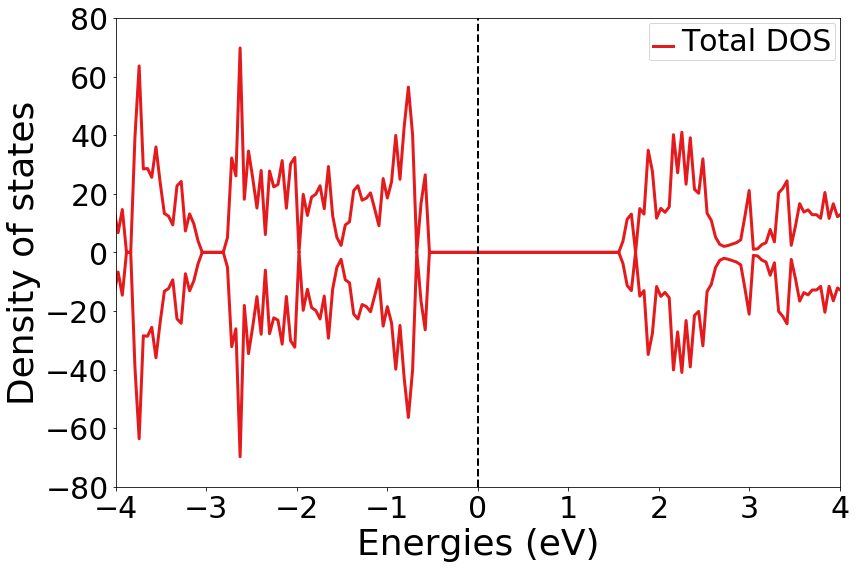

In [38]:
tdos = vasprun.tdos
plotter = DosPlotter()
plotter.add_dos("Total DOS", tdos)
plotter.show(xlim=[-4, 4], ylim=[-80, 80])

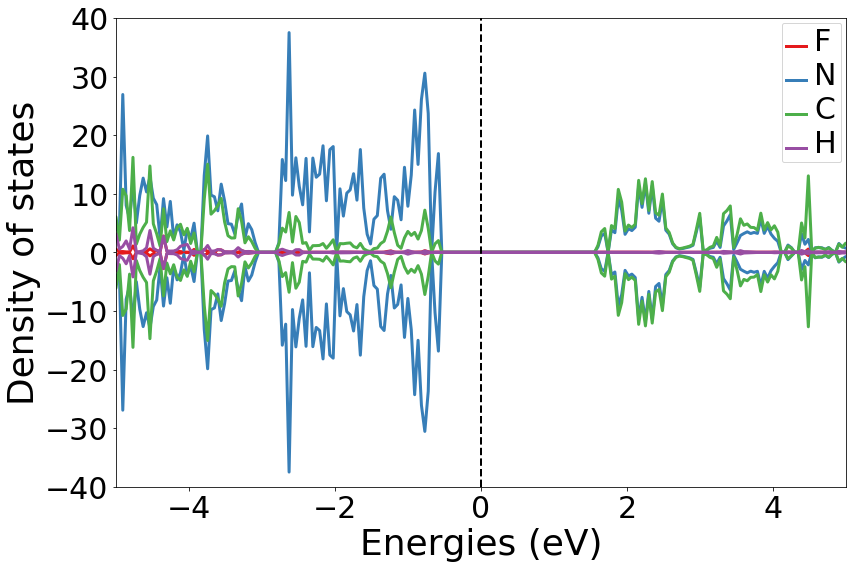

In [43]:
cdos = vasprun.complete_dos
element_dos = cdos.get_element_dos()
plotter = DosPlotter()
plotter.add_dos_dict(element_dos)
plotter.show(xlim=[-5, 5], ylim=[-40, 40])